In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import missingno
import time
from tqdm import tqdm,tqdm_notebook,tqdm_pandas
%matplotlib inline

## 读取静态文件

In [16]:
ad_static_fea  = pd.read_csv('./dataset/ad_static_feature.out',
                             sep='\t',
                             header=None,
                             names=['广告id', '创建时间','广告账户id','商品id','商品类型','广告行业id','素材尺寸'])

/mnt/7D8C5D9D3CC9F65C/lph/torch_py37/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3044: DtypeWarning: Columns (3,6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [17]:
ad_static_fea['创建时间'] = ad_static_fea['创建时间'].apply(lambda x: time.strftime("%Y-%m-%d",time.localtime(x))).values

In [18]:
ad_static_fea.head()

,广告id,创建时间,广告账户id,商品id,商品类型,广告行业id,素材尺寸
0,106452,2018-06-26,22226,16088,13,225,NaN
1,233649,2018-09-29,25681,7356,13,136,1
2,547531,2019-02-21,20696,-1,1,186,40
3,707841,2019-03-06,3968,-1,3,186,40
4,457009,2019-02-18,23614,7447,13,172,NaN


## 对曝光广告文件进行挖掘

In [20]:
temp_totalExposureLog_pro =  pd.read_csv('./dataset/totalExposureLog_pro.csv',sep=',')[['曝光广告id','曝光广告出价bid', '曝光广告素材尺寸','pctr','equality_ecpm']]

In [21]:
temp_totalExposureLog_pro.head()

,曝光广告id,曝光广告出价bid,曝光广告素材尺寸,pctr,equality_ecpm
0,451525,46,50,47.217,944.34
1,451525,56,50,39.129,782.58
2,451525,18,50,119.905,2398.10
3,451525,100,50,21.763,435.26
4,451525,20,50,107.212,2144.24


In [25]:
temp_totalExposureLog_math_fea = temp_totalExposureLog_pro.groupby(['曝光广告id']).agg({'曝光广告出价bid':[min, max, np.mean,np.std],
                                                       '曝光广告素材尺寸':[max, np.mean],
                                                       'pctr':[max, min, np.mean, np.std],
                                                       })

In [57]:
bid_fea = temp_totalExposureLog_math_fea['曝光广告出价bid'].reset_index()
bid_fea.columns = ['曝光广告id', 'bid_min', 'bid_max', 'bid_mean', 'bid_std']

In [63]:
ad_size_fea = temp_totalExposureLog_math_fea['曝光广告素材尺寸'].reset_index()
ad_size_fea.columns = ['曝光广告id', 'ad_size_max', 'ad_size_mean']

In [65]:
pctr_fea = temp_totalExposureLog_math_fea['pctr'].reset_index()
pctr_fea.columns = ['曝光广告id',  'pctr_max','pctr_min', 'pctr_mean', 'pctr_std']

In [66]:
bid_fea.head()

,曝光广告id,bid_min,bid_max,bid_mean,bid_std
0,1,24,1594,306.629630,420.721098
1,2,68,2969,440.037037,541.292953
2,3,10,68,23.166667,18.393840
3,4,10,1403,173.282392,132.116900
4,5,12,12,12.000000,NaN


In [67]:
ad_size_fea.head()

,曝光广告id,ad_size_max,ad_size_mean
0,1,64,64.0
1,2,36,36.0
2,3,64,64.0
3,4,64,64.0
4,5,50,50.0


In [69]:
pctr_fea.head()

,曝光广告id,pctr_max,pctr_min,pctr_mean,pctr_std
0,1,6.960,1.225,3.111519,1.255610
1,2,69.826,1.103,7.171383,7.878272
2,3,89.268,2.725,16.047167,25.080070
3,4,62.071,0.010,7.591223,5.730947
4,5,268.088,268.088,268.088000,NaN


In [70]:
fea_select_1 = pd.merge(bid_fea, ad_size_fea, on='曝光广告id')
fea_select_1 = pd.merge(fea_select_1, pctr_fea, on='曝光广告id')

In [77]:
fea_select_1  =fea_select_1.rename(index=str, columns={"曝光广告id": "广告id"})

In [9]:
## 广告id 创建时间 素材尺寸 广告行业id 商品类型 商品id 广告账户id 投放时段 人群定向 出价

In [79]:
ad_fea = pd.merge(ad_static_fea,fea_select_1, on='广告id',how='outer')

In [80]:
ad_fea

,广告id,创建时间,广告账户id,商品id,商品类型,广告行业id,素材尺寸,bid_min,bid_max,bid_mean,bid_std,ad_size_max,ad_size_mean,pctr_max,pctr_min,pctr_mean,pctr_std
0,106452,2018-06-26,22226.0,16088,13.0,225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,233649,2018-09-29,25681.0,7356,13.0,136,1,100.0,100.0,100.000000,NaN,1.0,1.0,0.841,0.841,0.841000,NaN
2,547531,2019-02-21,20696.0,-1,1.0,186,40,100.0,512.0,485.651163,90.166746,40.0,40.0,28.486,1.483,7.374188,5.335201
3,707841,2019-03-06,3968.0,-1,3.0,186,40,74.0,425.0,205.875000,142.742963,40.0,40.0,12.008,0.905,5.179125,3.513139
4,457009,2019-02-18,23614.0,7447,13.0,172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,733436,2019-03-19,22405.0,31722,5.0,117,64,15.0,794.0,118.551282,139.377619,64.0,64.0,63.112,0.076,6.941026,10.000894
6,249105,2019-03-15,11360.0,29999,18.0,145,44,51.0,109.0,72.666667,22.277043,44.0,44.0,33.469,14.670,20.021167,6.900286
7,160014,2019-03-14,6441.0,2373,18.0,198,36,13.0,282.0,71.915254,45.216067,36.0,36.0,29.112,4.463,15.680068,5.886980
8,541096,2019-03-13,5117.0,220,5.0,232,44,8.0,174.0,96.416667,42.904669,44.0,44.0,71.036,6.627,19.813083,19.477155
9,634000,2019-03-11,28588.0,20164,18.0,76,64,10.0,40.0,17.000000,8.514693,64.0,64.0,8.430,1.568,3.624941,1.624254


In [81]:
ad_static_fea.shape

(735911, 7)

In [82]:
fea_select_1.shape

(509280, 11)

In [84]:
len(np.unique(temp_totalExposureLog_pro['曝光广告id']))

509280

In [85]:
ad_fea.to_csv('./ad_fea_li.csv',index=None)

## 添加时间性质属性

#### 通常广告的曝光性具有上坡性，所以将广告时间分位三个阶段：Early stage， Mid_term stage，late stage

In [2]:
temp_totalExposureLog_time =  pd.read_csv('./dataset/totalExposureLog_pro.csv',sep=',')[['曝光广告id','广告请求时间','counts_day_y','pctr','equality_ecpm']]

In [6]:
temp_totalExposureLog_temp = temp_totalExposureLog_time.drop('counts_day_y',axis=1)

In [8]:
temp_totalExposureLog_temp['count'] = 1

In [10]:
temp_totalExposureLog_temp = temp_totalExposureLog_temp.groupby(['曝光广告id','广告请求时间']).sum().reset_index()

In [16]:
temp_totalExposureLog_temp.columns = ['广告id', '广告请求时间','pctr','equality_ecpm','count']

In [19]:
temp_totalExposureLog_temp

,广告id,广告请求时间,pctr,equality_ecpm,count
0,1,2019-02-20,26.020,435.10,7
1,1,2019-02-21,21.939,438.78,8
2,1,2019-02-22,36.052,721.04,12
3,2,2019-02-18,66.869,1337.38,10
4,2,2019-02-19,36.630,732.60,7
5,2,2019-02-21,84.180,1683.60,3
6,2,2019-02-22,46.077,921.54,9
7,2,2019-02-27,15.473,309.46,4
8,2,2019-02-28,18.126,244.16,3
9,2,2019-03-01,43.421,868.42,5


In [20]:
ad_fea =  pd.read_csv('./ad_fea_li.csv')

/mnt/7D8C5D9D3CC9F65C/lph/torch_py37/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3044: DtypeWarning: Columns (3,6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [21]:
ad_fea_temp = ad_fea[['广告id', '创建时间']]

In [22]:
temp_totalExposureLog_temp = temp_totalExposureLog_temp.merge(ad_fea_temp, on='广告id',how='outer')

In [27]:
temp_totalExposureLog_temp['data_'] = pd.to_datetime(temp_totalExposureLog_temp['广告请求时间']) - pd.to_datetime(temp_totalExposureLog_temp['创建时间'] )

In [31]:
temp_totalExposureLog_temp['count_per_pctr'] = temp_totalExposureLog_temp['count'] / temp_totalExposureLog_temp['pctr']

In [34]:
temp_totalExposureLog_temp.sort_values(['广告id','count_per_pctr'])

,广告id,广告请求时间,pctr,equality_ecpm,count,创建时间,data_,count_per_pctr
0,1,2019-02-20,26.020,435.10,7.0,2019-02-20,0 days,0.269024
2,1,2019-02-22,36.052,721.04,12.0,2019-02-20,2 days,0.332853
1,1,2019-02-21,21.939,438.78,8.0,2019-02-20,1 days,0.364647
5,2,2019-02-21,84.180,1683.60,3.0,2019-02-18,3 days,0.035638
10,2,2019-03-02,17.912,22.06,2.0,2019-02-18,12 days,0.111657
9,2,2019-03-01,43.421,868.42,5.0,2019-02-18,11 days,0.115152
13,2,2019-03-05,124.604,2065.92,17.0,2019-02-18,15 days,0.136432
12,2,2019-03-04,83.187,1663.74,12.0,2019-02-18,14 days,0.144253
3,2,2019-02-18,66.869,1337.38,10.0,2019-02-18,0 days,0.149546
8,2,2019-02-28,18.126,244.16,3.0,2019-02-18,10 days,0.165508


In [35]:
temp_totalExposureLog_temp.drop_duplicates(subset=['广告id'],keep='first',inplace=True)

In [39]:
temp_totalExposureLog_temp = temp_totalExposureLog_temp.drop(['广告请求时间', '创建时间'],axis=1)

In [40]:
temp_totalExposureLog_temp

,广告id,pctr,equality_ecpm,count,data_,count_per_pctr
0,1,26.02000,435.100000,7.0,0 days,0.269024
3,2,66.86900,1337.380000,10.0,0 days,0.149546
14,3,15.30200,306.040000,2.0,0 days,0.130702
18,4,66.73700,1334.740000,11.0,0 days,0.164826
20,5,268.08800,5361.760000,1.0,1 days,0.003730
21,6,53.05000,745.340000,8.0,1 days,0.150801
23,9,30.71500,614.300000,4.0,0 days,0.130230
26,12,191.86900,3837.380000,28.0,0 days,0.145933
27,13,121.30300,2191.860000,20.0,0 days,0.164876
35,18,20.90321,418.064255,4.0,117 days,0.191358


In [42]:
ad_fea_all = pd.merge(ad_fea, temp_totalExposureLog_temp, on='广告id')

In [51]:
ad_fea_all.data_ = ad_fea_all.data_.dt.days

In [53]:
import missingno

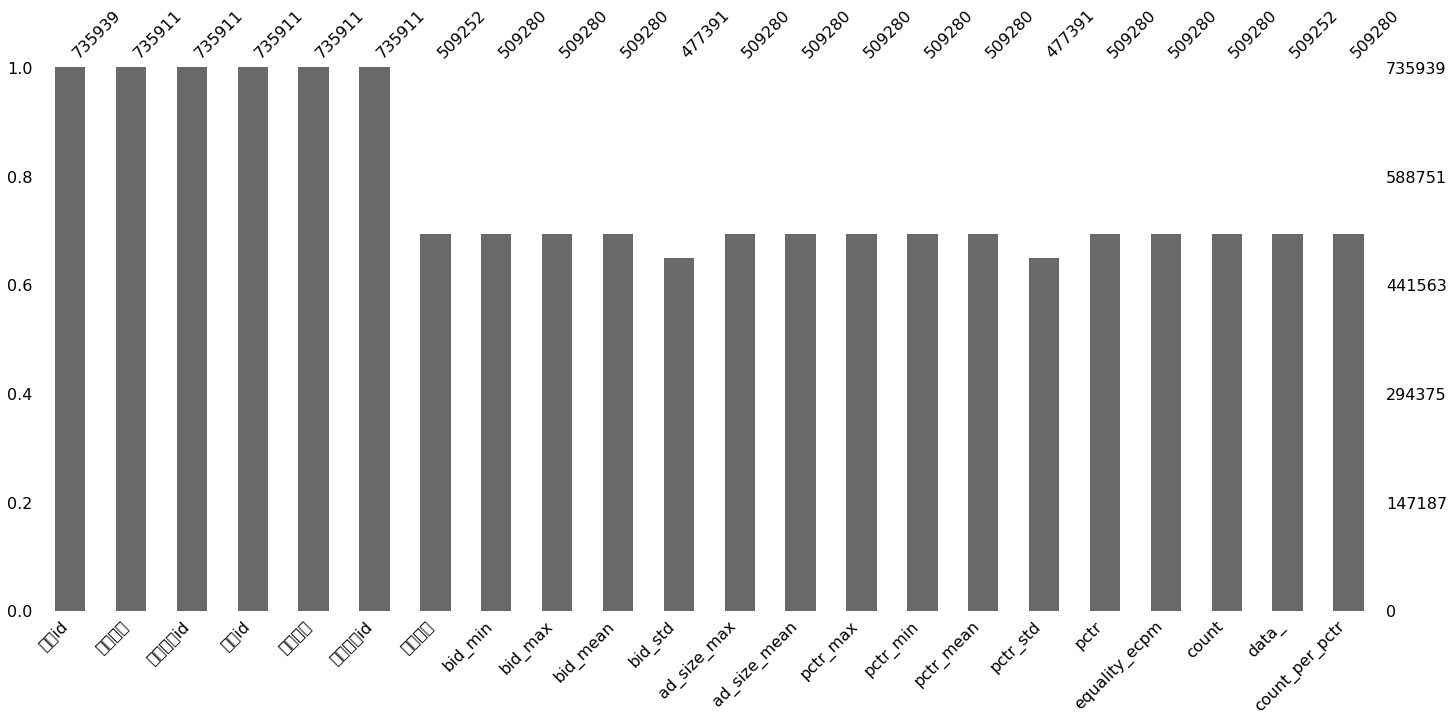

In [54]:
missingno.bar(ad_fea_all)

In [60]:
ad_fea_all = ad_fea_all.drop(['广告账户id','商品id'],axis=1)

ad_fea_all = ad_fea_all.rename({'商品类型':'good_type'},axis='columns')

ad_fea_all = pd.concat([ad_fea_all, pd.get_dummies(ad_fea_all['good_type'], prefix='doog_type_')], axis=1)

ad_fea_all = pd.concat([ad_fea_all, pd.get_dummies(ad_fea_all['广告行业id'], prefix='ad_type_id')], axis=1)

In [94]:
ad_fea_all['广告行业id'].values

array(['225', '136', '186', ..., nan, nan, nan], dtype=object)

In [102]:
ad_fea_all.to_csv('./ad_fea_all_429.cav',index=None)

In [103]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split

In [120]:
train_data, val_data, train_tar, val_tar = train_test_split(ad_fea_all.drop(['count','广告id','广告行业id','创建时间','素材尺寸'],axis=1), 
                                                            ad_fea_all['count'].replace({np.nan:ad_fea_all['count'].mean()}),test_size=0.3, random_state=10)

In [121]:
lgb_train = lgb.Dataset(train_data, train_tar) 
lgb_eval = lgb.Dataset(val_data, val_tar, reference=lgb_train)  

In [122]:
param = {'num_leaves': 31,
         'min_data_in_leaf': 30, 
         'objective':'regression',
         'max_depth': -1,
         'learning_rate': 0.01,
         "min_child_samples": 20,
         "boosting": "gbdt",
         "feature_fraction": 0.9,
         "bagging_freq": 1,
         "bagging_fraction": 0.9 ,
         "bagging_seed": 11,
         "metric": 'rmse',
         "lambda_l1": 0.1,
         "verbosity": -1,
         "nthread": 4,
         "random_state": 4590}
start = time.time()


lgb_origi = lgb.train(train_set=lgb_train,
                      early_stopping_rounds=20,
                      num_boost_round=10000,
                      params=param,
                      valid_sets=[lgb_train,lgb_eval])
end = time.time()
print('运行时间为{}秒'.format(round(end-start,0)))

[1]	training's rmse: 109.572	valid_1's rmse: 96.3077
Training until validation scores don't improve for 20 rounds.
[2]	training's rmse: 108.886	valid_1's rmse: 95.6716
[3]	training's rmse: 108.165	valid_1's rmse: 94.9281
[4]	training's rmse: 107.409	valid_1's rmse: 94.1923
[5]	training's rmse: 106.667	valid_1's rmse: 93.4446
[6]	training's rmse: 105.965	valid_1's rmse: 92.7265
[7]	training's rmse: 105.233	valid_1's rmse: 92.0042
[8]	training's rmse: 104.539	valid_1's rmse: 91.2918
[9]	training's rmse: 103.956	valid_1's rmse: 90.7271
[10]	training's rmse: 103.342	valid_1's rmse: 90.1551
[11]	training's rmse: 102.673	valid_1's rmse: 89.4783
[12]	training's rmse: 102.015	valid_1's rmse: 88.8323
[13]	training's rmse: 101.418	valid_1's rmse: 88.2662
[14]	training's rmse: 100.762	valid_1's rmse: 87.5985
[15]	training's rmse: 100.14	valid_1's rmse: 86.9499
[16]	training's rmse: 99.5844	valid_1's rmse: 86.4163
[17]	training's rmse: 98.943	valid_1's rmse: 85.7817
[18]	training's rmse: 98.3729	v

[156]	training's rmse: 57.4716	valid_1's rmse: 46.6782
[157]	training's rmse: 57.3828	valid_1's rmse: 46.6111
[158]	training's rmse: 57.2601	valid_1's rmse: 46.5219
[159]	training's rmse: 57.15	valid_1's rmse: 46.4448
[160]	training's rmse: 57.0308	valid_1's rmse: 46.3679
[161]	training's rmse: 56.9359	valid_1's rmse: 46.2984
[162]	training's rmse: 56.8401	valid_1's rmse: 46.2159
[163]	training's rmse: 56.7366	valid_1's rmse: 46.1499
[164]	training's rmse: 56.6358	valid_1's rmse: 46.0893
[165]	training's rmse: 56.5469	valid_1's rmse: 46.0259
[166]	training's rmse: 56.4586	valid_1's rmse: 45.9575
[167]	training's rmse: 56.3569	valid_1's rmse: 45.8894
[168]	training's rmse: 56.2637	valid_1's rmse: 45.8259
[169]	training's rmse: 56.1592	valid_1's rmse: 45.7633
[170]	training's rmse: 56.0636	valid_1's rmse: 45.7003
[171]	training's rmse: 55.9709	valid_1's rmse: 45.6318
[172]	training's rmse: 55.8787	valid_1's rmse: 45.5764
[173]	training's rmse: 55.7779	valid_1's rmse: 45.5154
[174]	traini

[309]	training's rmse: 48.6898	valid_1's rmse: 41.7605
[310]	training's rmse: 48.6515	valid_1's rmse: 41.7512
[311]	training's rmse: 48.6205	valid_1's rmse: 41.7372
[312]	training's rmse: 48.5734	valid_1's rmse: 41.7147
[313]	training's rmse: 48.5381	valid_1's rmse: 41.7137
[314]	training's rmse: 48.5174	valid_1's rmse: 41.7061
[315]	training's rmse: 48.4772	valid_1's rmse: 41.6905
[316]	training's rmse: 48.4457	valid_1's rmse: 41.6773
[317]	training's rmse: 48.4095	valid_1's rmse: 41.6684
[318]	training's rmse: 48.3567	valid_1's rmse: 41.6407
[319]	training's rmse: 48.3322	valid_1's rmse: 41.6245
[320]	training's rmse: 48.3085	valid_1's rmse: 41.6188
[321]	training's rmse: 48.2601	valid_1's rmse: 41.5888
[322]	training's rmse: 48.2281	valid_1's rmse: 41.5849
[323]	training's rmse: 48.2016	valid_1's rmse: 41.5785
[324]	training's rmse: 48.1793	valid_1's rmse: 41.5697
[325]	training's rmse: 48.134	valid_1's rmse: 41.5363
[326]	training's rmse: 48.1084	valid_1's rmse: 41.5394
[327]	train

[464]	training's rmse: 44.2068	valid_1's rmse: 40.5382
[465]	training's rmse: 44.1865	valid_1's rmse: 40.5411
[466]	training's rmse: 44.1579	valid_1's rmse: 40.5381
[467]	training's rmse: 44.1402	valid_1's rmse: 40.5348
[468]	training's rmse: 44.117	valid_1's rmse: 40.5189
[469]	training's rmse: 44.0904	valid_1's rmse: 40.5271
[470]	training's rmse: 44.0721	valid_1's rmse: 40.5183
[471]	training's rmse: 44.0461	valid_1's rmse: 40.5134
[472]	training's rmse: 44.0281	valid_1's rmse: 40.5063
[473]	training's rmse: 44.0062	valid_1's rmse: 40.5103
[474]	training's rmse: 43.9825	valid_1's rmse: 40.5051
[475]	training's rmse: 43.9609	valid_1's rmse: 40.5
[476]	training's rmse: 43.9351	valid_1's rmse: 40.4957
[477]	training's rmse: 43.8986	valid_1's rmse: 40.4852
[478]	training's rmse: 43.8705	valid_1's rmse: 40.4826
[479]	training's rmse: 43.8473	valid_1's rmse: 40.4813
[480]	training's rmse: 43.8264	valid_1's rmse: 40.479
[481]	training's rmse: 43.8093	valid_1's rmse: 40.4752
[482]	training'

[615]	training's rmse: 41.1392	valid_1's rmse: 40.0592
[616]	training's rmse: 41.1189	valid_1's rmse: 40.0626
[617]	training's rmse: 41.1031	valid_1's rmse: 40.0619
[618]	training's rmse: 41.0912	valid_1's rmse: 40.056
[619]	training's rmse: 41.0777	valid_1's rmse: 40.0534
[620]	training's rmse: 41.0556	valid_1's rmse: 40.0505
[621]	training's rmse: 41.0419	valid_1's rmse: 40.0488
[622]	training's rmse: 41.0253	valid_1's rmse: 40.038
[623]	training's rmse: 41.0158	valid_1's rmse: 40.0356
[624]	training's rmse: 40.9986	valid_1's rmse: 40.025
[625]	training's rmse: 40.9853	valid_1's rmse: 40.023
[626]	training's rmse: 40.9644	valid_1's rmse: 40.0215
[627]	training's rmse: 40.9472	valid_1's rmse: 40.0202
[628]	training's rmse: 40.9366	valid_1's rmse: 40.0173
[629]	training's rmse: 40.9173	valid_1's rmse: 40.0188
[630]	training's rmse: 40.8911	valid_1's rmse: 40.021
[631]	training's rmse: 40.8745	valid_1's rmse: 40.0256
[632]	training's rmse: 40.8594	valid_1's rmse: 40.0235
[633]	training'

[776]	training's rmse: 38.4562	valid_1's rmse: 39.7706
[777]	training's rmse: 38.4425	valid_1's rmse: 39.773
[778]	training's rmse: 38.4291	valid_1's rmse: 39.7723
[779]	training's rmse: 38.4091	valid_1's rmse: 39.7741
[780]	training's rmse: 38.3922	valid_1's rmse: 39.7754
[781]	training's rmse: 38.3714	valid_1's rmse: 39.7668
[782]	training's rmse: 38.3599	valid_1's rmse: 39.7605
[783]	training's rmse: 38.3455	valid_1's rmse: 39.7618
[784]	training's rmse: 38.3316	valid_1's rmse: 39.76
[785]	training's rmse: 38.319	valid_1's rmse: 39.7522
[786]	training's rmse: 38.3065	valid_1's rmse: 39.7571
[787]	training's rmse: 38.2957	valid_1's rmse: 39.7586
[788]	training's rmse: 38.2844	valid_1's rmse: 39.7562
[789]	training's rmse: 38.2641	valid_1's rmse: 39.7563
[790]	training's rmse: 38.2508	valid_1's rmse: 39.7564
[791]	training's rmse: 38.2352	valid_1's rmse: 39.7509
[792]	training's rmse: 38.2153	valid_1's rmse: 39.7501
[793]	training's rmse: 38.2019	valid_1's rmse: 39.7518
[794]	training

##  test

In [171]:
test = pd.read_csv('./dataset/test_sample.dat', sep='\t',names=['sample_id','广告id', 'set_time','su_size','ad_rigion_id','good_type','good_id','ad_count_id','time','people','pctr'])

In [192]:
test.shape

(20290, 11)

In [173]:
test1 = pd.merge(test[['广告id','sample_id']], ad_fea_all,on='广告id').replace({np.nan:ad_fea_all['count'].mean()})

In [199]:
diff

,广告id,sample_id
0,394352,1
1,585401,2
2,419408,3
3,405326,4
4,578942,5
5,269774,6
6,416368,7
7,574309,8
8,142702,9
9,255347,10


In [201]:
diff = test[['sample_id','广告id']]
diff_sample_id = []
for i in range(len(diff)):
    if diff.iloc[i,1] not in test1['广告id'].values:
        diff_sample_id.append(diff.iloc[i,0] )
        print(diff.iloc[i,0] )
        

1101
1289
1315
1419
1578
1713
1979
2562
3632
4043
4246
4516
5488
6027
6363
6477
6501
6699
7627
7845
8522
8685
9375
9598
9910
10398
10424
10670
10718
11554
11673
11832
12233
12245
14166
14462
14606
14693
15496
16457
16523
17004
17205
17433
18557
18864
19098
19156
20232
20252


In [202]:
len(diff_sample_id)

50

In [174]:
diff_id = [x for x in test['广告id'].values if x not in test1['广告id'].values]

In [182]:
train_data.shape

(515157, 864)

In [183]:
test1.shape

(20240, 870)

In [185]:
test_ = test1.sort_values('sample_id').drop(['sample_id','广告id','广告行业id','创建时间','素材尺寸'],axis=1)

In [191]:
len(lgb_origi.predict(test_.drop('count',axis=1), num_iteration=lgb_origi.best_iteration))

20240

In [254]:
submit = pd.DataFrame({'id':test1.sort_values('sample_id')['sample_id'],
                       'pred':lgb_origi.predict(test_.drop('count',axis=1), num_iteration=lgb_origi.best_iteration)})

In [255]:
submit1 = pd.DataFrame({'id':diff_sample_id,
                       'pred':submit.pred.mean()})

In [256]:
submit2 = pd.concat([submit, submit1],axis=0)

In [257]:
submit2 =submit2.sort_values('id')
submit2['pred'] = submit2['pred'].astype(int)

In [258]:
submit2

,id,pred
0,1,3
10,2,15
20,3,15
30,4,15
41,5,1
52,6,5
63,7,3
74,8,15
85,9,2
96,10,20


In [259]:
submit2.to_csv('./submit430.csv',header=None,index=None)